# Volatility Forecasting using Econometric and Machine Learning Models  
### Notebook 01: Data Collection & Return Construction

**Objective**  
This notebook prepares the foundational dataset for volatility forecasting by:
- Downloading daily market price data
- Computing log returns
- Constructing a realized volatility proxy
- Performing basic exploratory diagnostics

The outputs of this notebook are fully self-contained and will be used independently in subsequent modeling notebooks.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from scipy.stats import skew, kurtosis

plt.style.use("seaborn-v0_8")

## Data Selection

We use the **NIFTY 50 index** as the underlying asset.

**Why NIFTY 50?**
- Broad market representation
- High liquidity
- Strong relevance for Indian financial institutions
- Frequently used in risk management and derivatives pricing

**Frequency:** Daily  
**Time Horizon:** Long sample to capture multiple volatility regimes


In [2]:
ticker = "^NSEI"

data = yf.download(
    ticker,
    start="2010-01-01",
    auto_adjust=True,
    progress=False
)

data.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


## Data Cleaning

We ensure:
- Proper datetime indexing
- Removal of missing observations
- Use of adjusted prices for corporate action consistency


In [3]:
data[["Close"]]

Price,Close
Ticker,^NSEI
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000
...,...
2025-12-19,25966.400391
2025-12-22,26172.400391


In [4]:
data = data[["Close"]].dropna()
data.index = pd.to_datetime(data.index)
data

Price,Close
Ticker,^NSEI
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000
...,...
2025-12-19,25966.400391
2025-12-22,26172.400391


In [5]:
data.columns

MultiIndex([('Close', '^NSEI')],
           names=['Price', 'Ticker'])

In [6]:
data

Price,Close
Ticker,^NSEI
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000
...,...
2025-12-19,25966.400391
2025-12-22,26172.400391


In [7]:
data["log_return"] = np.log(data["Close"] / data["Close"].shift(1))
returns = data["log_return"].dropna()

returns.head()


,log_return
Date,
2010-01-05,0.008696
2010-01-06,0.000739
2010-01-07,-0.003547
2010-01-08,-0.003493
2010-01-11,0.000886


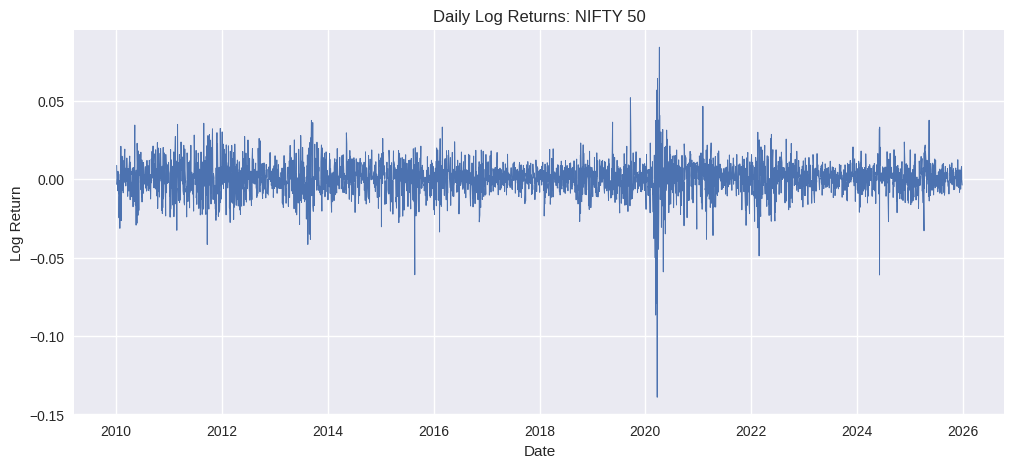

In [8]:
plt.figure(figsize=(12,5))
plt.plot(returns, linewidth=0.7)
plt.title("Daily Log Returns: NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


## Volatility Clustering

Financial returns often exhibit **volatility clustering**:
- Large shocks tend to be followed by large shocks
- Small shocks tend to be followed by small shocks

This stylized fact motivates ARCH/GARCH and ML-based volatility models.


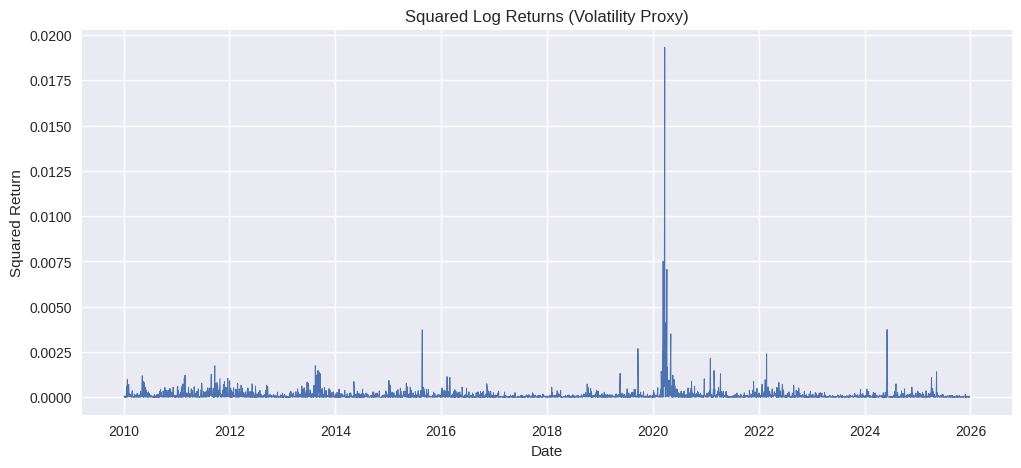

In [9]:
plt.figure(figsize=(12,5))
plt.plot(returns**2, linewidth=0.7)
plt.title("Squared Log Returns (Volatility Proxy)")
plt.xlabel("Date")
plt.ylabel("Squared Return")
plt.show()


## Realized Volatility Proxy

True volatility is unobservable.  
We approximate conditional variance using:

\[
RV_t = r_t^2
\]

This proxy is commonly used in both:
- Econometric volatility models
- Supervised ML volatility forecasting


In [10]:
realized_vol = returns**2
realized_vol.name = "realized_volatility"

realized_vol.head()


,realized_volatility
Date,
2010-01-05,7.562730e-05
2010-01-06,5.455874e-07
2010-01-07,1.257898e-05
2010-01-08,1.219860e-05
2010-01-11,7.853318e-07


## Descriptive Statistics of Returns

We examine higher moments to understand:
- Non-normality
- Tail behavior
- Motivation for heavy-tailed models


In [11]:
stats = pd.Series({
    "Mean": returns.mean(),
    "Std Dev": returns.std(),
    "Skewness": skew(returns),
    "Excess Kurtosis": kurtosis(returns)
})

stats


,0
Mean,0.000409
Std Dev,0.010440
Skewness,-0.909219
Excess Kurtosis,13.666974


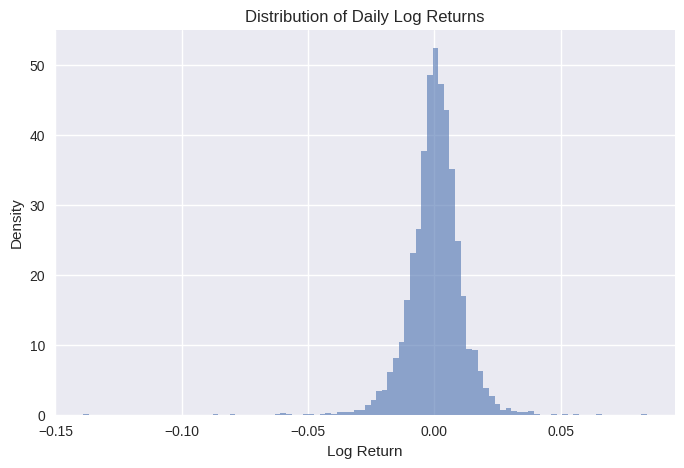

In [14]:
plt.figure(figsize=(8,5))
plt.hist(returns, bins=100, density=True, alpha=0.6)
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.show()


In [15]:
returns.to_csv("returns.csv")
realized_vol.to_csv("realized_volatility.csv")
data.to_csv("price_data.csv")
